<a href="https://colab.research.google.com/github/DhruvArora96/Hands-On/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
X = 2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1)

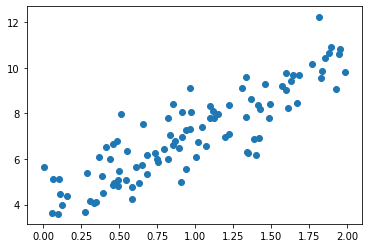

In [3]:
plt.scatter(X,Y)

In [0]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [5]:
theta_best

array([[3.97037876],
       [3.17270204]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97037876],
       [10.31578285]])

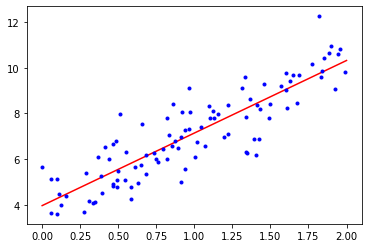

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,Y,"b.")
plt.show()

In [0]:
######################Gradient Descent##############################

In [9]:
eta = 0.1 
n_iterations = 1000
m=100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y)
    theta = theta - eta*gradients
theta

array([[3.97037876],
       [3.17270204]])

In [0]:
##################Stochastic Gradient Descent###########################

In [0]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi=Y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients

In [25]:
theta

array([[3.92128841],
       [3.21109869]])

In [14]:
theta

array([[3.92128841],
       [3.21109869]])

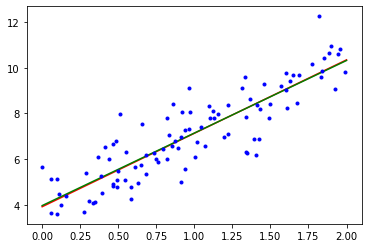

In [15]:
y_predict1 = X_new_b.dot(theta)
plt.plot(X_new,y_predict1,"r-")
plt.plot(X_new,y_predict,"g-")
plt.plot(X,Y,"b.")
plt.show()